In [71]:
# Import Packages
from ml import *
import pandas as pd
from datetime import datetime
import numpy as np

In [72]:
# Load data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

# Manipulate data
new_data = data.loc['2017-11-05':]

In [73]:
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
0,2015-01-02,klant_1,8421,0
1,2015-01-02,klant_2,4547,0
2,2015-01-02,klant_3,13,0
3,2015-01-02,klant_4,0,0
4,2015-01-02,klant_5,0,0
...,...,...,...,...
9835,2019-06-29,klant_2,0,24917
9836,2019-06-29,klant_3,0,20
9837,2019-06-29,klant_4,0,1
9838,2019-06-29,klant_5,0,116


In [74]:
cust_filter = data['cust_id'] == 'klant_4'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()
data = data.set_index(data.procesdag, drop=True) # drop haalt procesdag column weg
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
procesdag,,,,
2015-01-02,2015-01-02,klant_4,0.0,0.0
2015-01-05,2015-01-05,klant_4,0.0,0.0
2015-01-06,2015-01-06,klant_4,0.0,0.0
2015-01-07,2015-01-07,klant_4,0.0,0.0
2015-01-08,2015-01-08,klant_4,0.0,0.0
...,...,...,...,...
2019-06-24,2019-06-24,klant_4,223.0,145.0
2019-06-25,2019-06-25,klant_4,145.0,136.0
2019-06-26,2019-06-26,klant_4,136.0,108.0


In [75]:
data = data['2017-11-05':]

In [76]:
data.procesdag = pd.to_datetime(data.procesdag)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [77]:
sec = ((data.procesdag).astype(int) / 1e9).astype(int)

In [78]:
min((sec - sec.shift(1)).dropna())
max((sec - sec.shift(1)).dropna())

259200.0

In [79]:
y = data.aantal_pakketten_volgende_dag
X = data[['procesdag', 'aantal_pakketten']]

In [80]:
train_X = X[:7000]
valid_X = X[7000:]
train_y = y[:7000]
valid_y = y[7000:]

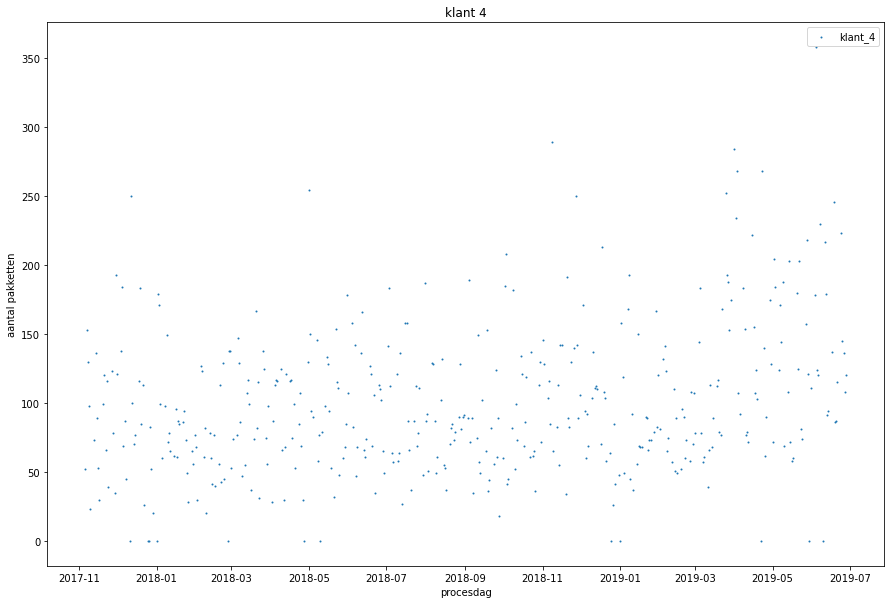

In [81]:
train_X3 = train_X.where(data['cust_id'] == 'klant_4').dropna()
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(train_X3['procesdag'], train_X3.aantal_pakketten, label='klant_4', s=1)

plt.ylabel('aantal pakketten')
plt.xlabel('procesdag')
plt.title('klant 4')
plt.legend();

In [82]:
train_X3

,procesdag,aantal_pakketten
procesdag,,
2017-11-06,2017-11-06,52.0
2017-11-07,2017-11-07,153.0
2017-11-08,2017-11-08,130.0
2017-11-09,2017-11-09,98.0
2017-11-10,2017-11-10,23.0
...,...,...
2019-06-24,2019-06-24,223.0
2019-06-25,2019-06-25,145.0
2019-06-26,2019-06-26,136.0
